### Import Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
from sklearn.preprocessing import OrdinalEncoder , LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score

In [57]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

### Load Dataset

In [58]:
df = pd.read_csv("Hospital_Inpatient_Discharges.csv")
df

C:\Users\HP\AppData\Local\Temp\ipykernel_9836\1366688716.py:1: DtypeWarning: Columns (10,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Hospital_Inpatient_Discharges.csv")


,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,"320,922.43","60,241.34"
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,"61,665.22","9,180.69"
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Surgical,Medicaid,NaN,NaN,NaN,N,"42,705.34","11,366.5"
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Major,Medical,Medicare,Medicaid,NaN,NaN,Y,"72,700.17","12,111.75"
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicare,Medicaid,NaN,NaN,Y,"55,562.51","8,339.72"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101583,Finger Lakes,Steuben,5001000.0,866.0,Corning Hospital,18 to 29,OOS,F,White,Not Span/Hispanic,...,Minor,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,N,"6,296.75","4,197.53"
2101584,Hudson Valley,Westchester,5902001.0,1045.0,White Plains Hospital Center,50 to 69,125,M,Multi-racial,Unknown,...,Major,Major,Medical,Medicaid,NaN,NaN,NaN,Y,"122,882.04","37,761.67"
2101585,New York City,Manhattan,7002054.0,1464.0,New York-Presbyterian Hospital - Columbia Pres...,30 to 49,109,M,White,Not Span/Hispanic,...,Moderate,Minor,Surgical,Private Health Insurance,NaN,NaN,NaN,N,"291,358.19","117,144.76"
2101586,New York City,Kings,7001045.0,1692.0,Woodhull Medical & Mental Health Center,50 to 69,112,F,Other Race,Spanish/Hispanic,...,Moderate,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,"27,830.75","18,969.13"


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101588 entries, 0 to 2101587
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

In [60]:
df['Total Charges'] = df['Total Charges'].str.replace(',', '').astype(float)

In [61]:
describe = df.describe()
describe

,Operating Certificate Number,Permanent Facility Id,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges
count,2.089497e+06,2.090946e+06,2101588.0,2.101588e+06,2.101588e+06,2.101588e+06,2.101588e+06
mean,4.990270e+06,1.033841e+03,2021.0,4.141057e+02,1.028546e+01,2.122646e+00,7.330542e+04
std,2.234939e+06,7.094093e+02,0.0,2.442334e+02,5.961765e+00,9.556966e-01,1.492020e+05
min,1.010000e+05,1.000000e+00,2021.0,1.000000e+00,0.000000e+00,0.000000e+00,3.400000e-01
25%,2.951001e+06,5.280000e+02,2021.0,1.940000e+02,5.000000e+00,1.000000e+00,1.909500e+04
50%,5.902001e+06,1.045000e+03,2021.0,3.830000e+02,9.000000e+00,2.000000e+00,3.842152e+04
75%,7.002020e+06,1.453000e+03,2021.0,6.400000e+02,1.500000e+01,3.000000e+00,7.723338e+04
max,7.004010e+06,1.035500e+04,2021.0,9.560000e+02,2.500000e+01,4.000000e+00,1.793575e+07


In [62]:
df["Length of Stay"] = df["Length of Stay"].replace("120 +", 120)
df["Length of Stay"] = pd.to_numeric(df["Length of Stay"])
los = df["Length of Stay"]
los

0          27
1           4
2           2
3           5
4           3
           ..
2101583     1
2101584    13
2101585     7
2101586     2
2101587     7
Name: Length of Stay, Length: 2101588, dtype: int64

In [63]:
df.isnull().sum()

Hospital Service Area                    10642
Hospital County                          10642
Operating Certificate Number             12091
Permanent Facility Id                    10642
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      45062
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCSR Diagnosis Code                       1634
CCSR Diagnosis Description                1634
CCSR Procedure Code                     576021
CCSR Procedure Description              576021
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

In [64]:
df.nunique()

Hospital Service Area                        8
Hospital County                             57
Operating Certificate Number               168
Permanent Facility Id                      205
Facility Name                              205
Age Group                                    5
Zip Code - 3 digits                         50
Gender                                       3
Race                                         4
Ethnicity                                    4
Length of Stay                             120
Type of Admission                            6
Patient Disposition                         19
Discharge Year                               1
CCSR Diagnosis Code                        477
CCSR Diagnosis Description                 477
CCSR Procedure Code                        320
CCSR Procedure Description                 320
APR DRG Code                               334
APR DRG Description                        334
APR MDC Code                                26
APR MDC Descr

In [65]:
df = df[df["Patient Disposition"] != "Expired"]

### EDA

C:\Users\HP\AppData\Local\Temp\ipykernel_9836\3785019428.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Payment Typology 1", y= "Length of Stay", data = df, palette=sns.color_palette("tab10"))
C:\Users\HP\AppData\Local\Temp\ipykernel_9836\3785019428.py:1: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.boxplot(x = "Payment Typology 1", y= "Length of Stay", data = df, palette=sns.color_palette("tab10"))


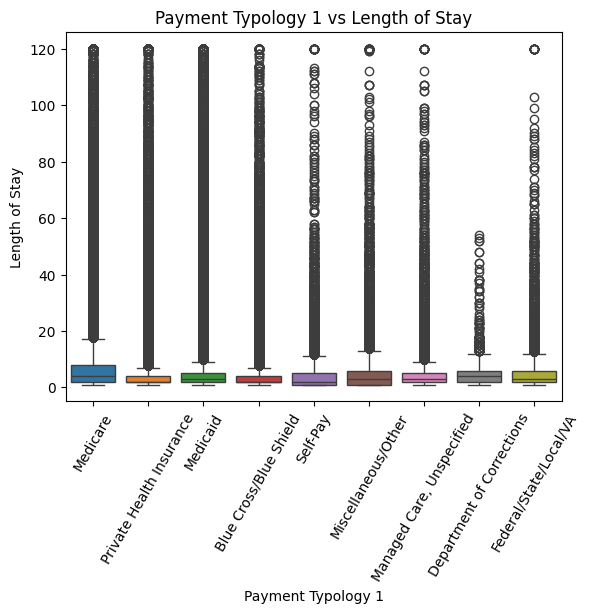

In [66]:
sns.boxplot(x = "Payment Typology 1", y= "Length of Stay", data = df, palette=sns.color_palette("tab10"))
plt.title("Payment Typology 1 vs Length of Stay")
plt.xticks(rotation = 60)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9836\1722070896.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Age Group", data = df[df["Payment Typology 1"] == "Medicare"], palette=sns.color_palette("tab10"))
C:\Users\HP\AppData\Local\Temp\ipykernel_9836\1722070896.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(x = "Age Group", data = df[df["Payment Typology 1"] == "Medicare"], palette=sns.color_palette("tab10"))


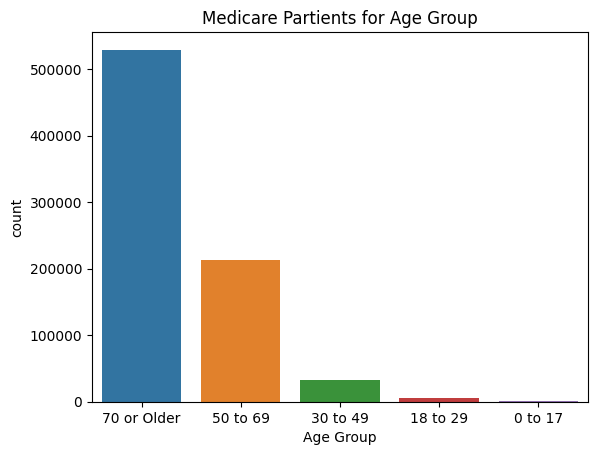

In [67]:
sns.countplot(x = "Age Group", data = df[df["Payment Typology 1"] == "Medicare"], palette=sns.color_palette("tab10"))
plt.title("Medicare Partients for Age Group")
plt.show()

### Features Encoding

Encoding of features was done manually and separately using Encoder

In [68]:
df = df.drop(["Hospital Service Area", "Hospital County", "Operating Certificate Number","Facility Name", 
              "Zip Code - 3 digits", "Patient Disposition", "Discharge Year", "CCSR Diagnosis Description", 
              "CCSR Procedure Description", "APR DRG Description", "APR MDC Description", "APR Severity of Illness Description", 
              "Payment Typology 2", "Payment Typology 3", "Birth Weight", "Total Costs"], axis = 1)

In [69]:
age_group_index = {"0 to 17":1, "18 to 29":2, "30 to 49":3, "50 to 69":4, "70 or Older":5}
gender_index = {"U":1, "F":2, "M":3}
risk_and_severity_index = {np.nan:0, "Minor":1, "Moderate":2, "Major":3, "Extreme":4}

In [70]:
df["Age Group"] = df["Age Group"].apply(lambda x: age_group_index[x])
df["Gender"] = df["Gender"].apply(lambda x: gender_index[x])
df["APR Risk of Mortality"] = df["APR Risk of Mortality"].apply(lambda x: risk_and_severity_index[x])

In [71]:
encoder = LabelEncoder()

In [72]:
df.isnull().sum()

Permanent Facility Id                10590
Age Group                                0
Gender                                   0
Race                                     0
Ethnicity                                0
Length of Stay                           0
Type of Admission                        0
CCSR Diagnosis Code                   1614
CCSR Procedure Code                 566234
APR DRG Code                             0
APR MDC Code                             0
APR Severity of Illness Code             0
APR Risk of Mortality                    0
APR Medical Surgical Description         0
Payment Typology 1                       0
Emergency Department Indicator           0
Total Charges                            0
dtype: int64

In [73]:
df["Race"] = encoder.fit_transform(np.asarray(df["Race"]).reshape(-1,1))
df["Ethnicity"] = encoder.fit_transform(np.asarray(df["Ethnicity"]).reshape(-1,1))
df["Type of Admission"] = encoder.fit_transform(np.asarray(df["Type of Admission"]).reshape(-1,1))
df["CCSR Diagnosis Code"] = encoder.fit_transform(np.asarray(df["CCSR Diagnosis Code"]).reshape(-1,1))
df["CCSR Procedure Code"] = encoder.fit_transform(np.asarray(df["CCSR Procedure Code"]).reshape(-1,1))
df["APR Medical Surgical Description"] = encoder.fit_transform(np.asarray(df["APR Medical Surgical Description"]).reshape(-1,1))
df["Payment Typology 1"] = encoder.fit_transform(np.asarray(df["Payment Typology 1"]).reshape(-1,1))
df["Emergency Department Indicator"] = encoder.fit_transform(np.asarray(df["Emergency Department Indicator"]).reshape(-1,1))

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
df.isnull().sum()

Permanent Facility Id               10590
Age Group                               0
Gender                                  0
Race                                    0
Ethnicity                               0
Length of Stay                          0
Type of Admission                       0
CCSR Diagnosis Code                     0
CCSR Procedure Code                     0
APR DRG Code                            0
APR MDC Code                            0
APR Severity of Illness Code            0
APR Risk of Mortality                   0
APR Medical Surgical Description        0
Payment Typology 1                      0
Emergency Department Indicator          0
Total Charges                           0
dtype: int64

In [75]:
df = df.dropna(subset=["Permanent Facility Id"])

### Train Test Split

In [76]:
X = df.drop(["Length of Stay"], axis=1)
y = df["Length of Stay"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Regression Model

In [78]:
dtree = DecisionTreeRegressor(max_depth=12)

In [79]:
dtree.fit(X_train, y_train)
train_prediction = dtree.predict(X_train)
test_prediction = dtree.predict(X_test)

In [ ]:
# To understand whether over-learning occurred, RMSEs of training and testing data were examined separately.
# The max_depth is adjusted until these two values ​​are equal.

print("RMSE: Train ", np.sqrt(mean_squared_error(y_train, train_prediction)))
print("RMSE: Test ", np.sqrt(mean_squared_error(y_test, test_prediction)))

RMSE: Train  3.462018694232199
RMSE: Test  3.832790796333072


#### Make the label column categorical

In [81]:
bins = [0, 5, 10, 20, 30, 50, 120]
labels = [5, 10, 20, 30, 50, 120]

In [82]:
df["los_bin"] =pd.cut(x=df["Length of Stay"], bins = bins)
df["los_label"] =pd.cut(x=df["Length of Stay"], bins= bins, labels= labels)

In [83]:
df["los_bin"] = df["los_bin"].apply(lambda x: str(x).replace(",","-"))
df["los_bin"] = df["los_bin"].apply(lambda x: str(x).replace("120","120+"))

C:\Users\HP\AppData\Local\Temp\ipykernel_9836\1110780245.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="los_bin", data = df, palette=sns.color_palette("tab10"))
C:\Users\HP\AppData\Local\Temp\ipykernel_9836\1110780245.py:1: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.countplot(x="los_bin", data = df, palette=sns.color_palette("tab10"))


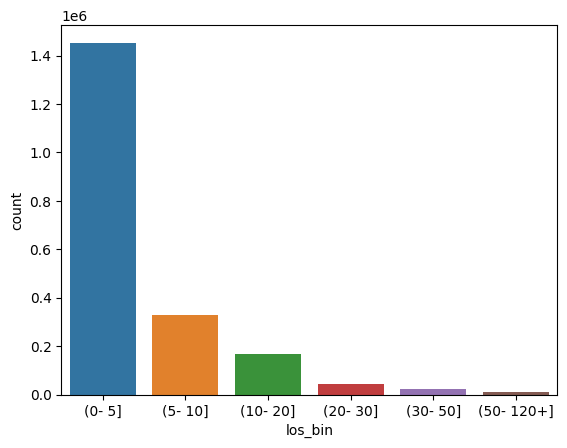

In [84]:
sns.countplot(x="los_bin", data = df, palette=sns.color_palette("tab10"))
plt.show()

In [85]:
X_ = df.drop(["Length of Stay", "los_bin", "los_label"], axis = 1)
y_ = df["los_label"]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

### Classification Model

In [99]:
dtree = DecisionTreeClassifier(max_depth=15)

In [100]:
dtree.fit(X_train, y_train)
train_prediction = dtree.predict(X_train)
test_prediction = dtree.predict(X_test)

In [101]:
print("Train Accuracy: ", accuracy_score(y_train, train_prediction))
print("Test Accuracy: ", accuracy_score(y_test, test_prediction))
print("Classification Report: ", classification_report(y_test, test_prediction))

Train Accuracy:  0.8636093724082605
Test Accuracy:  0.840775956688495
Classification Report:                precision    recall  f1-score   support

           5       0.92      0.95      0.93    290621
          10       0.62      0.59      0.60     66162
          20       0.61      0.63      0.62     33291
          30       0.53      0.38      0.44      8746
          50       0.53      0.42      0.47      4388
         120       0.76      0.57      0.65      2227

    accuracy                           0.84    405435
   macro avg       0.66      0.59      0.62    405435
weighted avg       0.84      0.84      0.84    405435

